In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [2]:
# 定义变量初始化函数
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

In [3]:
# discriminater net 参数
X = tf.placeholder(tf.float32, shape=[None, 784])

D_W1 = tf.Variable(xavier_init([784, 128]))
D_b1 = tf.Variable(tf.zeros(shape=[128]))

D_W2 = tf.Variable(xavier_init([128, 1]))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

theta_D = [D_W1, D_W2, D_b1, D_b2]

In [4]:
# generator net 参数
Z = tf.placeholder(tf.float32, shape=[None, 100])

G_W1 = tf.Variable(xavier_init([100, 128]))
G_b1 = tf.Variable(tf.zeros(shape=[128]))

G_W2 = tf.Variable(xavier_init([128, 784]))
G_b2 = tf.Variable(tf.zeros(shape=[784]))

theta_G = [G_W1, G_W2, G_b1, G_b2]

In [5]:
# 随机样本函数
def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

In [6]:
# 生成网络
def generator(z):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    G_prob = tf.nn.sigmoid(G_log_prob)

    return G_prob

In [7]:
# 判别网络
def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)

    return D_prob, D_logit

In [8]:
# 画图
def plot(samples):
    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [9]:
# 用生成网络生成图片，用判别网络判别图片
G_sample = generator(Z)
D_real, D_logit_real = discriminator(X)
D_fake, D_logit_fake = discriminator(G_sample)

In [10]:
# 定义损失函数

# D_loss = -tf.reduce_mean(tf.log(D_real) + tf.log(1. - D_fake))
# G_loss = -tf.reduce_mean(tf.log(D_fake))

D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=D_logit_real, labels=tf.ones_like(D_logit_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))

In [ ]:
# 定义优化器
D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)

Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz


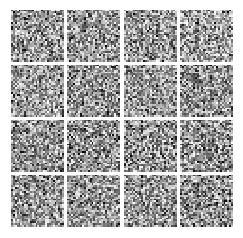

Iter: 0, D_loss: 1.6466, G_loss: 2.2975
Iter: 1000, D_loss: 0.0119, G_loss: 7.6536
Iter: 2000, D_loss: 0.0765, G_loss: 4.2170
Iter: 3000, D_loss: 0.0626, G_loss: 5.4834
Iter: 4000, D_loss: 0.1313, G_loss: 5.4349
Iter: 5000, D_loss: 0.1529, G_loss: 4.7556
Iter: 6000, D_loss: 0.5440, G_loss: 3.7947
Iter: 7000, D_loss: 0.5230, G_loss: 3.4814
Iter: 8000, D_loss: 0.4691, G_loss: 4.0349
Iter: 9000, D_loss: 0.6450, G_loss: 3.2161


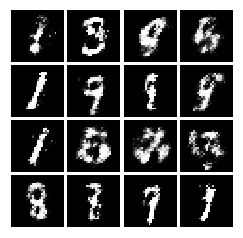

Iter: 10000, D_loss: 0.5867, G_loss: 3.0774
Iter: 11000, D_loss: 0.6145, G_loss: 2.6911
Iter: 12000, D_loss: 0.6435, G_loss: 2.7004
Iter: 13000, D_loss: 0.7779, G_loss: 2.4707
Iter: 14000, D_loss: 0.7155, G_loss: 2.4029
Iter: 15000, D_loss: 0.9797, G_loss: 2.0977
Iter: 16000, D_loss: 0.7519, G_loss: 2.5340
Iter: 17000, D_loss: 0.6805, G_loss: 2.6145
Iter: 18000, D_loss: 0.6964, G_loss: 2.2145
Iter: 19000, D_loss: 0.9662, G_loss: 1.8325


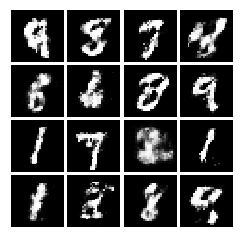

Iter: 20000, D_loss: 0.8178, G_loss: 2.2402
Iter: 21000, D_loss: 0.6981, G_loss: 2.2875
Iter: 22000, D_loss: 0.8239, G_loss: 2.3523
Iter: 23000, D_loss: 0.6151, G_loss: 2.2770
Iter: 24000, D_loss: 0.8019, G_loss: 1.9037
Iter: 25000, D_loss: 0.6526, G_loss: 2.1047
Iter: 26000, D_loss: 0.5446, G_loss: 2.5075
Iter: 27000, D_loss: 0.6761, G_loss: 2.5119
Iter: 28000, D_loss: 0.7563, G_loss: 2.2366
Iter: 29000, D_loss: 0.6641, G_loss: 2.5829


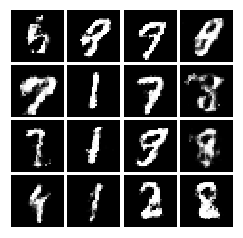

Iter: 30000, D_loss: 0.8073, G_loss: 1.9042
Iter: 31000, D_loss: 0.6679, G_loss: 2.3301
Iter: 32000, D_loss: 0.6161, G_loss: 2.2949
Iter: 33000, D_loss: 0.5819, G_loss: 2.2641
Iter: 34000, D_loss: 0.6040, G_loss: 2.2761
Iter: 35000, D_loss: 0.5877, G_loss: 2.5905
Iter: 36000, D_loss: 0.7389, G_loss: 2.3627
Iter: 37000, D_loss: 0.6306, G_loss: 2.3004
Iter: 38000, D_loss: 0.7348, G_loss: 2.6110
Iter: 39000, D_loss: 0.6606, G_loss: 2.1151


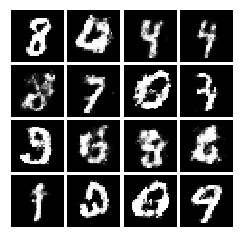

Iter: 40000, D_loss: 0.6769, G_loss: 2.5981
Iter: 41000, D_loss: 0.6259, G_loss: 2.1930
Iter: 42000, D_loss: 0.6318, G_loss: 2.3662
Iter: 43000, D_loss: 0.6364, G_loss: 2.8072
Iter: 44000, D_loss: 0.5831, G_loss: 2.3836
Iter: 45000, D_loss: 0.5147, G_loss: 2.5642
Iter: 46000, D_loss: 0.7503, G_loss: 2.5071
Iter: 47000, D_loss: 0.6525, G_loss: 2.7082
Iter: 48000, D_loss: 0.7020, G_loss: 2.4603
Iter: 49000, D_loss: 0.6128, G_loss: 2.8463


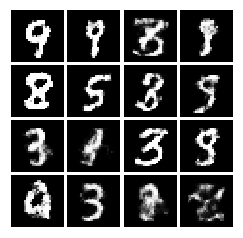

Iter: 50000, D_loss: 0.5911, G_loss: 2.7034
Iter: 51000, D_loss: 0.6228, G_loss: 2.3953
Iter: 52000, D_loss: 0.5339, G_loss: 2.7419
Iter: 53000, D_loss: 0.5939, G_loss: 2.4881
Iter: 54000, D_loss: 0.5617, G_loss: 2.1281
Iter: 55000, D_loss: 0.5249, G_loss: 2.4004
Iter: 56000, D_loss: 0.4756, G_loss: 2.6230
Iter: 57000, D_loss: 0.6019, G_loss: 2.2479
Iter: 58000, D_loss: 0.5919, G_loss: 2.8806
Iter: 59000, D_loss: 0.5219, G_loss: 2.9459


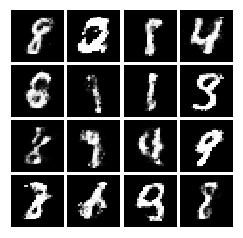

Iter: 60000, D_loss: 0.5821, G_loss: 2.5791
Iter: 61000, D_loss: 0.6376, G_loss: 2.4794
Iter: 62000, D_loss: 0.6211, G_loss: 2.6369
Iter: 63000, D_loss: 0.4722, G_loss: 2.4429
Iter: 64000, D_loss: 0.5436, G_loss: 2.3590
Iter: 65000, D_loss: 0.5410, G_loss: 2.7161
Iter: 66000, D_loss: 0.7443, G_loss: 2.1188
Iter: 67000, D_loss: 0.7033, G_loss: 2.6455
Iter: 68000, D_loss: 0.5965, G_loss: 2.7215
Iter: 69000, D_loss: 0.7159, G_loss: 2.3480


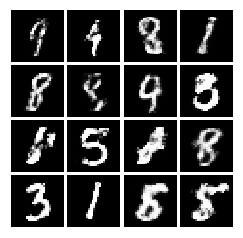

Iter: 70000, D_loss: 0.6335, G_loss: 2.3752
Iter: 71000, D_loss: 0.4531, G_loss: 2.7940
Iter: 72000, D_loss: 0.5419, G_loss: 2.8836
Iter: 73000, D_loss: 0.5356, G_loss: 2.6785
Iter: 74000, D_loss: 0.7070, G_loss: 2.1837
Iter: 75000, D_loss: 0.5971, G_loss: 2.5024
Iter: 76000, D_loss: 0.6750, G_loss: 2.5703
Iter: 77000, D_loss: 0.6958, G_loss: 2.3155
Iter: 78000, D_loss: 0.6349, G_loss: 2.4616
Iter: 79000, D_loss: 0.6177, G_loss: 2.7288


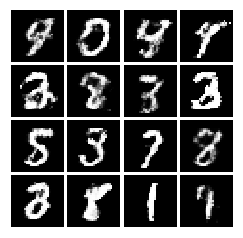

Iter: 80000, D_loss: 0.6199, G_loss: 2.4447
Iter: 81000, D_loss: 0.6565, G_loss: 2.4324
Iter: 82000, D_loss: 0.7153, G_loss: 2.0531
Iter: 83000, D_loss: 0.6719, G_loss: 2.8736
Iter: 84000, D_loss: 0.5165, G_loss: 2.3466
Iter: 85000, D_loss: 0.6036, G_loss: 2.2694
Iter: 86000, D_loss: 0.7327, G_loss: 2.2923
Iter: 87000, D_loss: 0.7557, G_loss: 2.5343
Iter: 88000, D_loss: 0.5359, G_loss: 2.2471
Iter: 89000, D_loss: 0.5885, G_loss: 1.9559


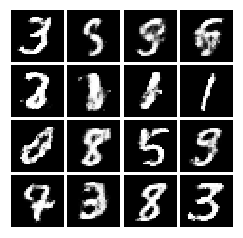

Iter: 90000, D_loss: 0.5961, G_loss: 2.3473
Iter: 91000, D_loss: 0.6523, G_loss: 2.1804
Iter: 92000, D_loss: 0.5996, G_loss: 2.4270
Iter: 93000, D_loss: 0.7053, G_loss: 2.3400
Iter: 94000, D_loss: 0.7083, G_loss: 2.0902
Iter: 95000, D_loss: 0.6026, G_loss: 2.3566
Iter: 96000, D_loss: 0.6087, G_loss: 2.1441
Iter: 97000, D_loss: 0.7902, G_loss: 2.7048
Iter: 98000, D_loss: 0.7031, G_loss: 2.3019
Iter: 99000, D_loss: 0.5146, G_loss: 2.3914


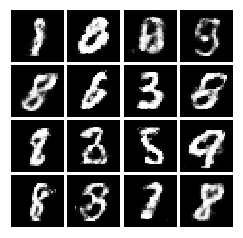

Iter: 100000, D_loss: 0.5309, G_loss: 2.4938
Iter: 101000, D_loss: 0.5747, G_loss: 2.2255
Iter: 102000, D_loss: 0.7966, G_loss: 2.3462
Iter: 103000, D_loss: 0.5967, G_loss: 2.0026
Iter: 104000, D_loss: 0.6273, G_loss: 2.1484
Iter: 105000, D_loss: 0.5468, G_loss: 2.4550
Iter: 106000, D_loss: 0.7451, G_loss: 2.2055
Iter: 107000, D_loss: 0.6216, G_loss: 2.2338
Iter: 108000, D_loss: 0.5919, G_loss: 2.3930
Iter: 109000, D_loss: 0.6169, G_loss: 2.3610


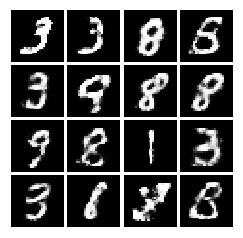

Iter: 110000, D_loss: 0.5988, G_loss: 2.4209
Iter: 111000, D_loss: 0.6272, G_loss: 2.1425
Iter: 112000, D_loss: 0.5697, G_loss: 2.5244
Iter: 113000, D_loss: 0.5074, G_loss: 2.3121
Iter: 114000, D_loss: 0.4934, G_loss: 2.4424
Iter: 115000, D_loss: 0.7030, G_loss: 2.4360
Iter: 116000, D_loss: 0.4663, G_loss: 2.7614
Iter: 117000, D_loss: 0.5505, G_loss: 2.3846
Iter: 118000, D_loss: 0.6315, G_loss: 2.5372
Iter: 119000, D_loss: 0.6620, G_loss: 2.3049


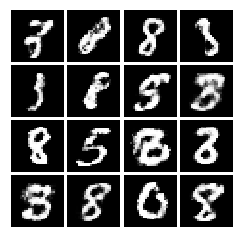

Iter: 120000, D_loss: 0.5573, G_loss: 2.3795
Iter: 121000, D_loss: 0.6840, G_loss: 2.5147
Iter: 122000, D_loss: 0.5924, G_loss: 2.5660
Iter: 123000, D_loss: 0.6111, G_loss: 2.2763
Iter: 124000, D_loss: 0.5437, G_loss: 2.4484
Iter: 125000, D_loss: 0.5422, G_loss: 2.6621
Iter: 126000, D_loss: 0.5873, G_loss: 2.4808
Iter: 127000, D_loss: 0.5945, G_loss: 2.7480
Iter: 128000, D_loss: 0.6008, G_loss: 2.3131
Iter: 129000, D_loss: 0.4815, G_loss: 2.7969


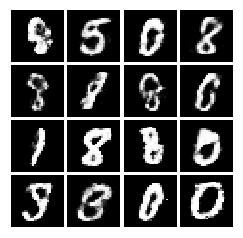

Iter: 130000, D_loss: 0.6008, G_loss: 2.5912
Iter: 131000, D_loss: 0.5866, G_loss: 2.0767
Iter: 132000, D_loss: 0.6685, G_loss: 2.1732
Iter: 133000, D_loss: 0.5760, G_loss: 2.5043
Iter: 134000, D_loss: 0.5432, G_loss: 2.4709
Iter: 135000, D_loss: 0.4820, G_loss: 2.7420
Iter: 136000, D_loss: 0.5068, G_loss: 2.5955
Iter: 137000, D_loss: 0.6261, G_loss: 2.3684
Iter: 138000, D_loss: 0.5802, G_loss: 2.5950
Iter: 139000, D_loss: 0.6098, G_loss: 2.4613


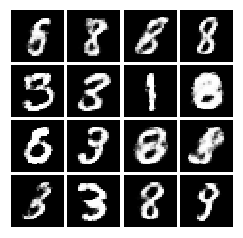

Iter: 140000, D_loss: 0.4577, G_loss: 2.5724
Iter: 141000, D_loss: 0.5809, G_loss: 2.1818
Iter: 142000, D_loss: 0.6694, G_loss: 2.3254
Iter: 143000, D_loss: 0.3947, G_loss: 2.5660
Iter: 144000, D_loss: 0.5685, G_loss: 2.5255
Iter: 145000, D_loss: 0.5441, G_loss: 2.7354
Iter: 146000, D_loss: 0.6331, G_loss: 2.7643
Iter: 147000, D_loss: 0.5996, G_loss: 2.3586
Iter: 148000, D_loss: 0.4764, G_loss: 2.3892
Iter: 149000, D_loss: 0.6169, G_loss: 2.1646


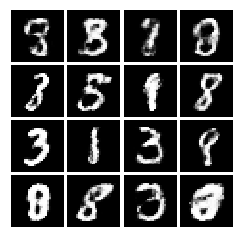

Iter: 150000, D_loss: 0.5688, G_loss: 2.5987
Iter: 151000, D_loss: 0.4725, G_loss: 2.6709
Iter: 152000, D_loss: 0.5500, G_loss: 2.6439
Iter: 153000, D_loss: 0.5878, G_loss: 2.7474
Iter: 154000, D_loss: 0.5061, G_loss: 2.8209
Iter: 155000, D_loss: 0.6137, G_loss: 2.5688
Iter: 156000, D_loss: 0.4498, G_loss: 2.6655
Iter: 157000, D_loss: 0.5847, G_loss: 2.4901
Iter: 158000, D_loss: 0.5048, G_loss: 2.8275
Iter: 159000, D_loss: 0.6121, G_loss: 2.6812


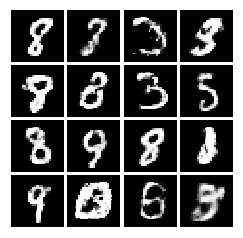

Iter: 160000, D_loss: 0.4643, G_loss: 3.0192
Iter: 161000, D_loss: 0.5378, G_loss: 2.8503
Iter: 162000, D_loss: 0.4514, G_loss: 3.0028
Iter: 163000, D_loss: 0.6462, G_loss: 2.4757
Iter: 164000, D_loss: 0.5222, G_loss: 2.5549
Iter: 165000, D_loss: 0.5304, G_loss: 2.6401
Iter: 166000, D_loss: 0.5152, G_loss: 2.5598
Iter: 167000, D_loss: 0.6064, G_loss: 2.3499
Iter: 168000, D_loss: 0.4980, G_loss: 2.4844
Iter: 169000, D_loss: 0.4782, G_loss: 2.6805


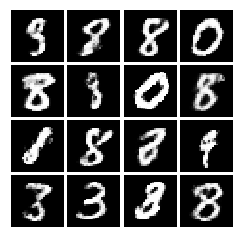

Iter: 170000, D_loss: 0.6240, G_loss: 2.9327
Iter: 171000, D_loss: 0.4292, G_loss: 2.7586
Iter: 172000, D_loss: 0.5796, G_loss: 2.8819
Iter: 173000, D_loss: 0.5895, G_loss: 2.6033
Iter: 174000, D_loss: 0.4740, G_loss: 2.7804
Iter: 175000, D_loss: 0.5154, G_loss: 3.0286
Iter: 176000, D_loss: 0.4855, G_loss: 2.7532
Iter: 177000, D_loss: 0.5965, G_loss: 3.0320
Iter: 178000, D_loss: 0.6136, G_loss: 2.7287
Iter: 179000, D_loss: 0.4357, G_loss: 2.4614


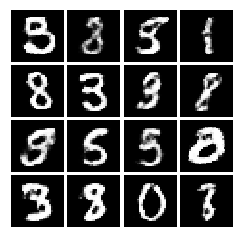

Iter: 180000, D_loss: 0.6533, G_loss: 2.7054
Iter: 181000, D_loss: 0.5797, G_loss: 2.7171
Iter: 182000, D_loss: 0.6016, G_loss: 2.3896
Iter: 183000, D_loss: 0.4966, G_loss: 2.8644
Iter: 184000, D_loss: 0.5435, G_loss: 3.0761
Iter: 185000, D_loss: 0.4605, G_loss: 2.6972
Iter: 186000, D_loss: 0.4630, G_loss: 2.6523
Iter: 187000, D_loss: 0.6955, G_loss: 2.9159
Iter: 188000, D_loss: 0.4550, G_loss: 3.3208
Iter: 189000, D_loss: 0.5249, G_loss: 2.7933


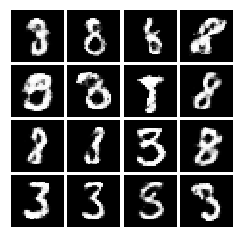

Iter: 190000, D_loss: 0.5856, G_loss: 2.8034
Iter: 191000, D_loss: 0.4797, G_loss: 2.8252
Iter: 192000, D_loss: 0.4856, G_loss: 2.8362
Iter: 193000, D_loss: 0.5394, G_loss: 2.6833
Iter: 194000, D_loss: 0.4875, G_loss: 2.9687
Iter: 195000, D_loss: 0.4341, G_loss: 3.1201
Iter: 196000, D_loss: 0.4553, G_loss: 2.5263
Iter: 197000, D_loss: 0.5263, G_loss: 2.9575
Iter: 198000, D_loss: 0.6667, G_loss: 2.7583
Iter: 199000, D_loss: 0.5022, G_loss: 2.8673


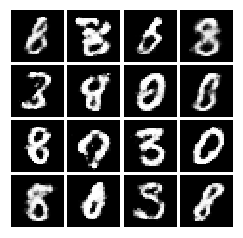

Iter: 200000, D_loss: 0.5755, G_loss: 2.6757
Iter: 201000, D_loss: 0.5177, G_loss: 2.7570
Iter: 202000, D_loss: 0.5672, G_loss: 2.9729
Iter: 203000, D_loss: 0.5242, G_loss: 2.6270
Iter: 204000, D_loss: 0.4295, G_loss: 2.8587
Iter: 205000, D_loss: 0.5295, G_loss: 2.8773
Iter: 206000, D_loss: 0.4729, G_loss: 2.8418
Iter: 207000, D_loss: 0.3907, G_loss: 2.6908
Iter: 208000, D_loss: 0.6428, G_loss: 2.8540
Iter: 209000, D_loss: 0.4454, G_loss: 2.7966


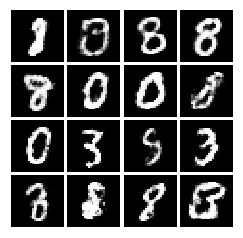

Iter: 210000, D_loss: 0.6004, G_loss: 3.3871
Iter: 211000, D_loss: 0.5341, G_loss: 3.0031
Iter: 212000, D_loss: 0.3675, G_loss: 2.8273


In [ ]:
mb_size = 128
Z_dim = 100

mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('out/'):
    os.makedirs('out/')

i = 0

# 开始训练
for it in range(1000000):
    # 每隔1000次循环输出一次loss并保存生成的图片
    if it % 1000 == 0:
        samples = sess.run(G_sample, feed_dict={Z: sample_Z(16, Z_dim)})

        fig = plot(samples)
        
        # 每隔1w次显示一张图
        if i % 10 == 0:
            plt.show()
            
        plt.savefig('out/{}.png'.format(str(i).zfill(3)), bbox_inches='tight')
        i += 1
        plt.close(fig)

    X_mb, _ = mnist.train.next_batch(mb_size)

    _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: X_mb, Z: sample_Z(mb_size, Z_dim)})
    _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(mb_size, Z_dim)})

    if it % 1000 == 0:
        print('Iter: %d, D_loss: %.4f, G_loss: %.4f' % (it, D_loss_curr, G_loss_curr))
